In [1]:
import requests
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/sebastianbrockschmidt/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.shape

(2443651, 9)

In [7]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                                   836265
Beauty                                               19312
Handmade Clothing, Shoes & Accessories               19229
Bath & Body                                          19092
Birthday Gifts                                       18978
Manicure & Pedicure Products                         18940
Skin Care                                            18769
Make-up                                              18756
Hair Care                                            18735
Fragrances                                           18564
Handmade Gifts                                       18295
Handmade Home Décor                                  18146
Luggage and travel gear                              18142
Handmade Jewellery                                   18044
Handmade Artwork                                     17878
Women                                                17772
Handmade Home & Kitchen Products               

In [10]:
frequency_table.shape

(296,)

In [8]:
top_5 = frequency_table.head(5)
top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [19]:
top_10 = frequency_table.head(10)

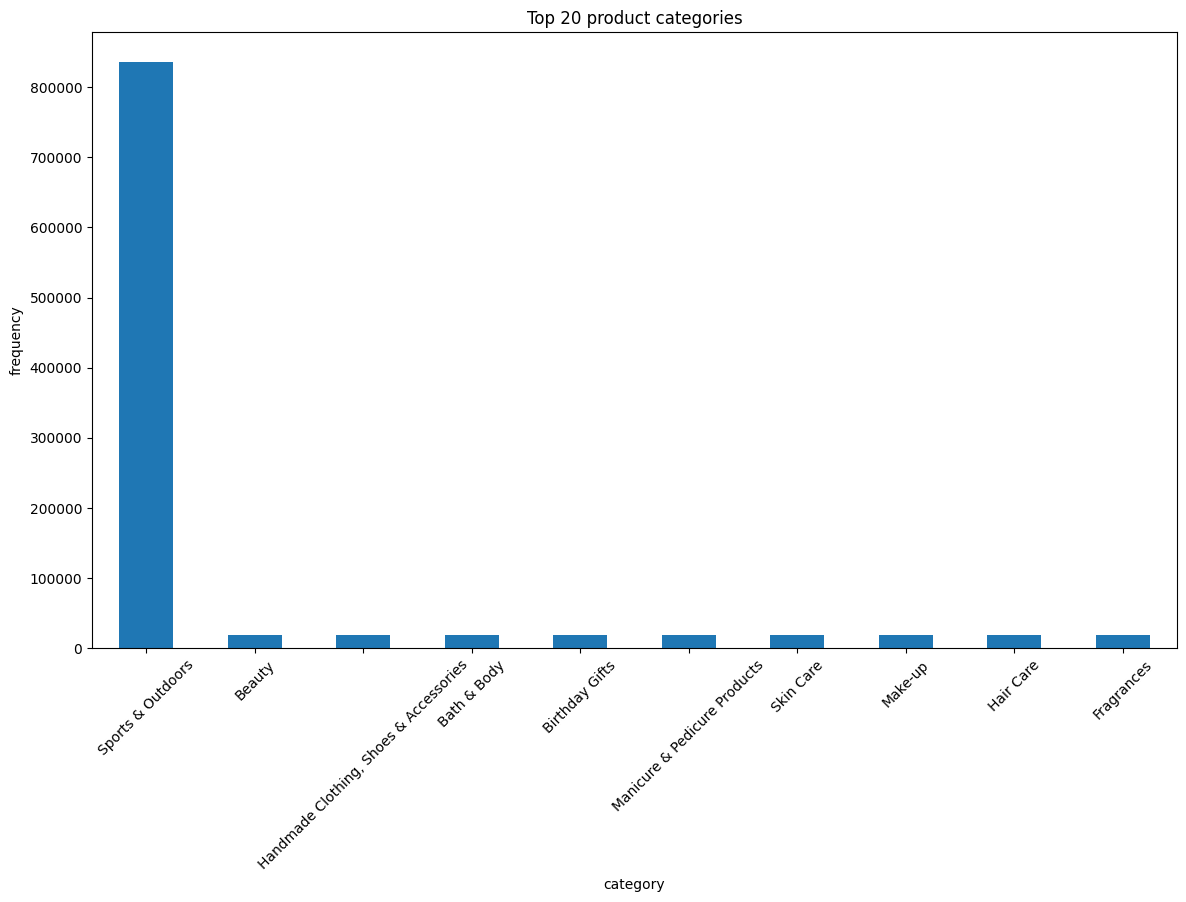

In [20]:
plt.figure(figsize=(14, 8))
top_10.plot(kind='bar')
plt.title('Top 20 product categories')
plt.xlabel('category')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()


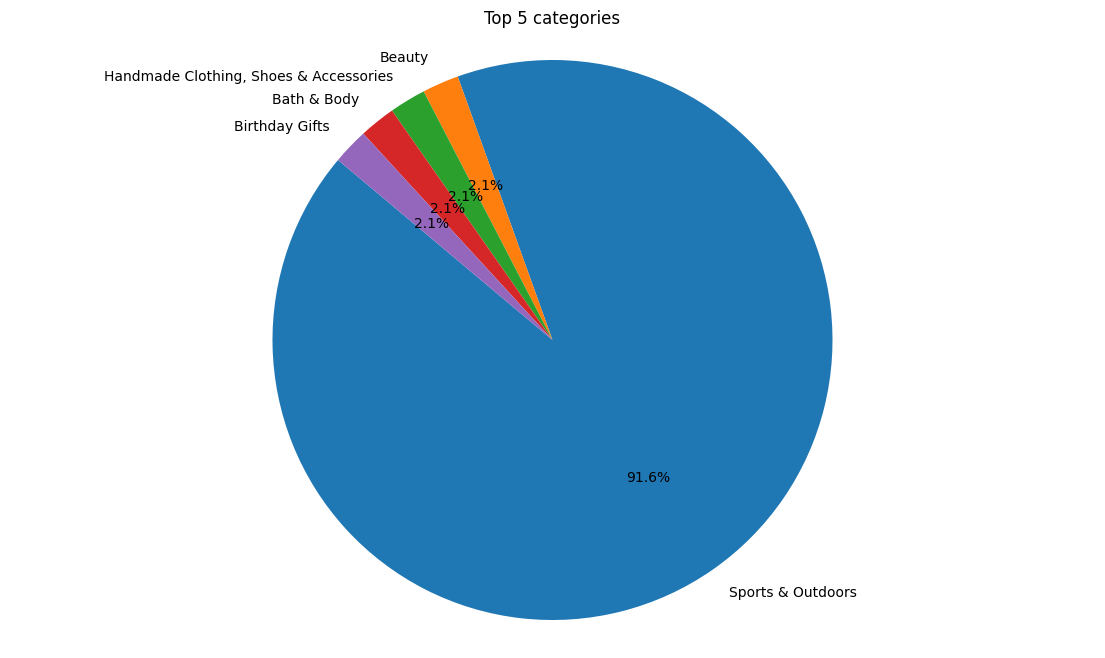

In [18]:
plt.figure(figsize=(14, 8))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 categories')
plt.axis('equal')
plt.show()

Sports & Outdoors is clearly dominating

In [21]:
df.price.mean()

89.24380943923663

In [22]:
df.price.median()

19.09

In [23]:
df.price.mode()

0    9.99
Name: price, dtype: float64

The average price point (mean) is way higher than the mode (9.99).

In [24]:
df.price.var()

119445.48532254907

In [25]:
df.price.std()

345.60886175349884

In [26]:
df['price'].max() - df['price'].min()


100000.0

In [27]:
df['price'].quantile(0.75) - df['price'].quantile(0.25)

36.0

In [28]:
df['price'].max()

100000.0

In [29]:
df['price'].min()

0.0

The dispersion seems to be quite high, compared to the mean.

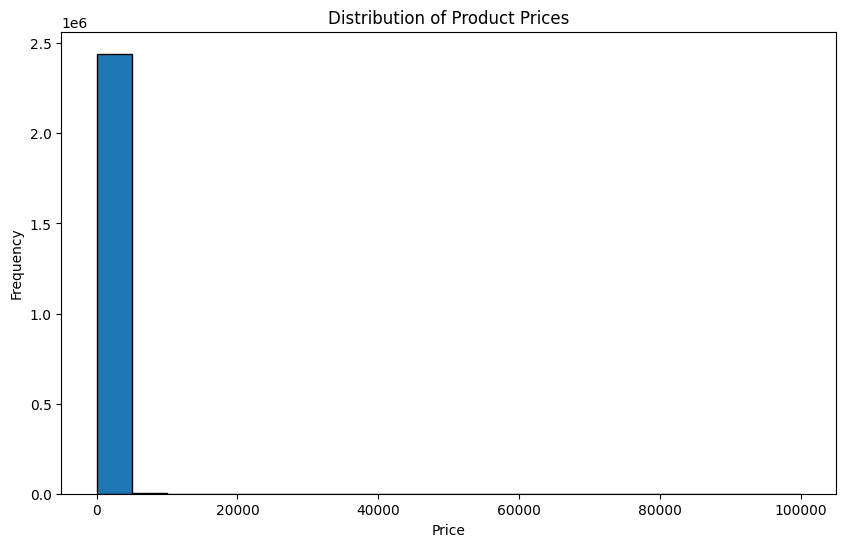

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Range is to big, the data could be cut from some outliers.

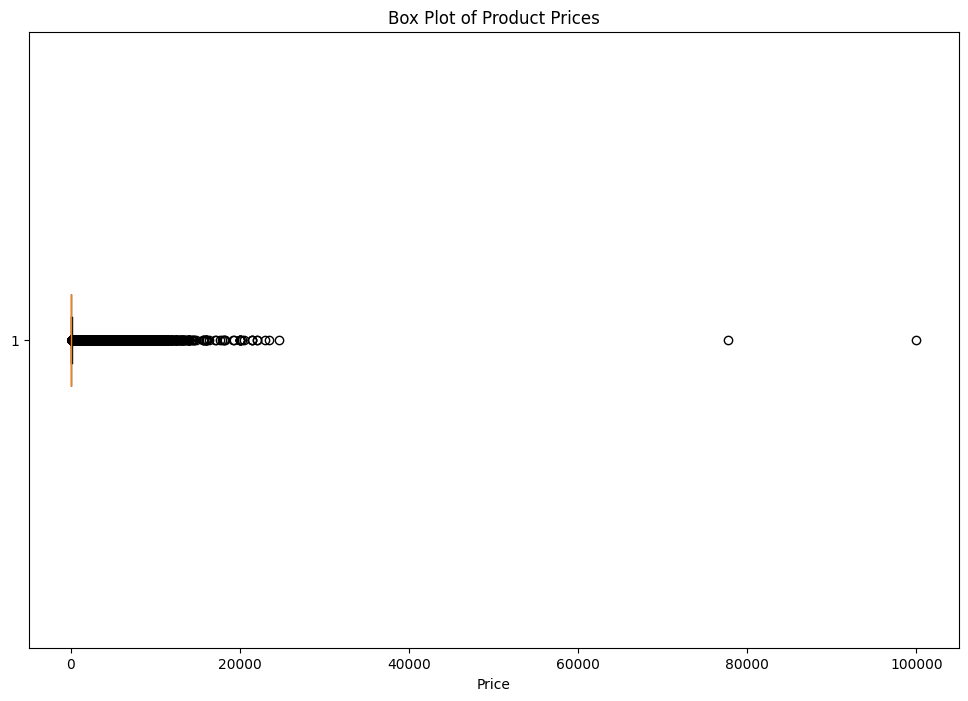

In [36]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['price'], vert=False, patch_artist=True)
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

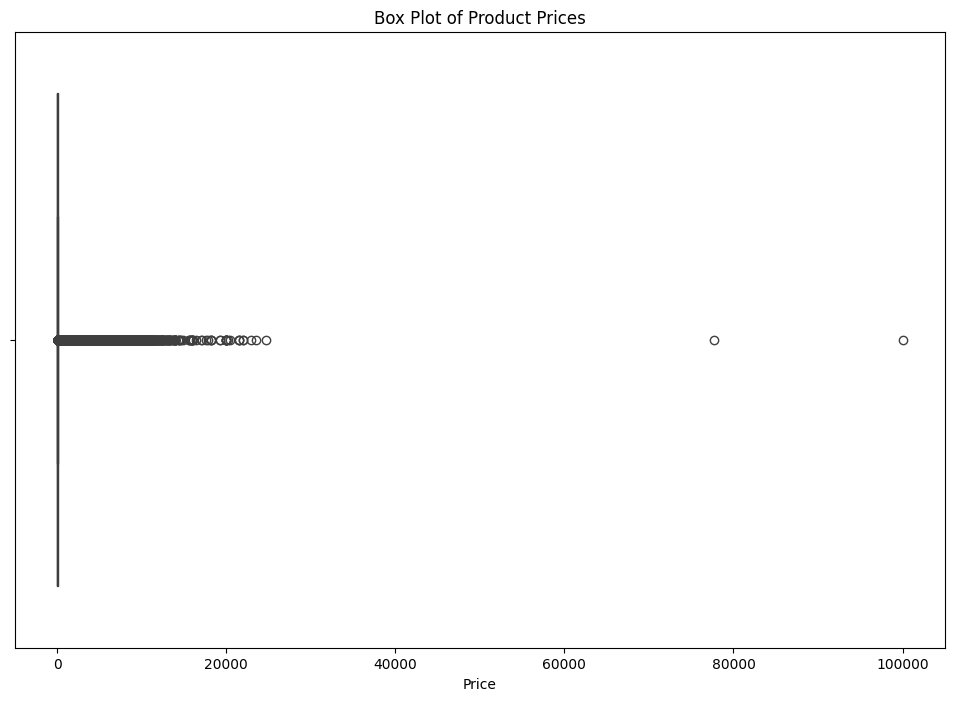

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

In [38]:
df.stars.mean()

2.152836472966065

In [39]:
df.stars.var()

4.817434029796862

In [40]:
df.stars.mode()

0    0.0
Name: stars, dtype: float64

In [41]:
df.stars.max()

5.0

average rating suggests small customer satisfaction

In [42]:
df.stars.var()

4.817434029796862

In [43]:
df.stars.std()

2.1948653785134207

In [45]:
df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

4.4

In [46]:
df['stars'].quantile(0.75)

4.4

In [47]:
df['stars'].quantile(0.25)

0.0

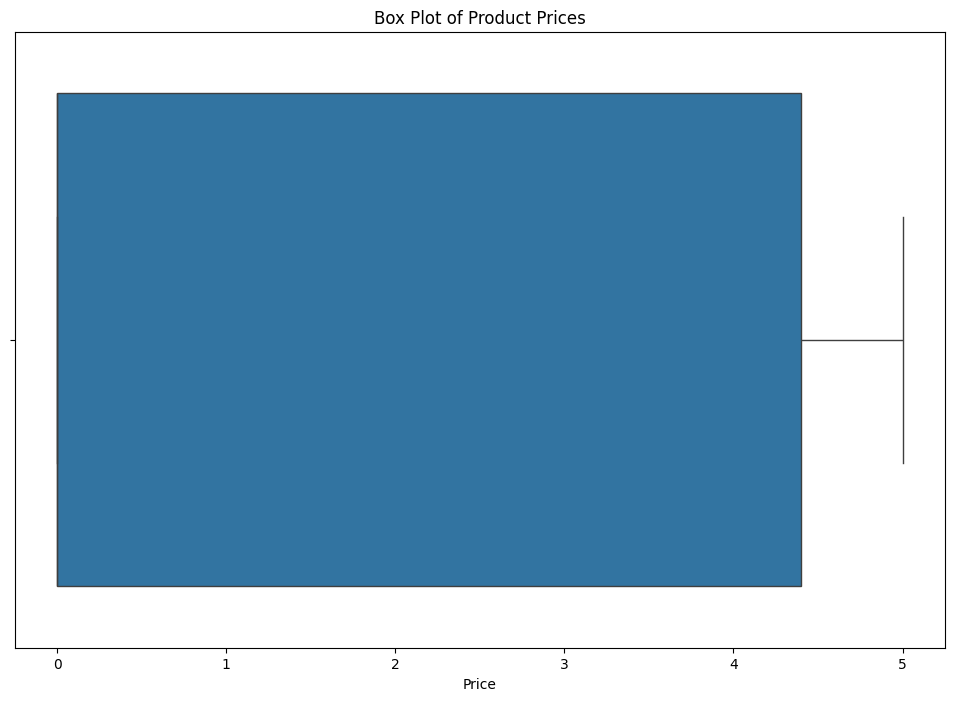

In [48]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['stars'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price')
plt.show()

There is wide variation in customer feedback

In [50]:
df['stars'].skew()

0.08120735761080985

In [52]:
df['stars'].kurtosis()

-1.9260061280432985

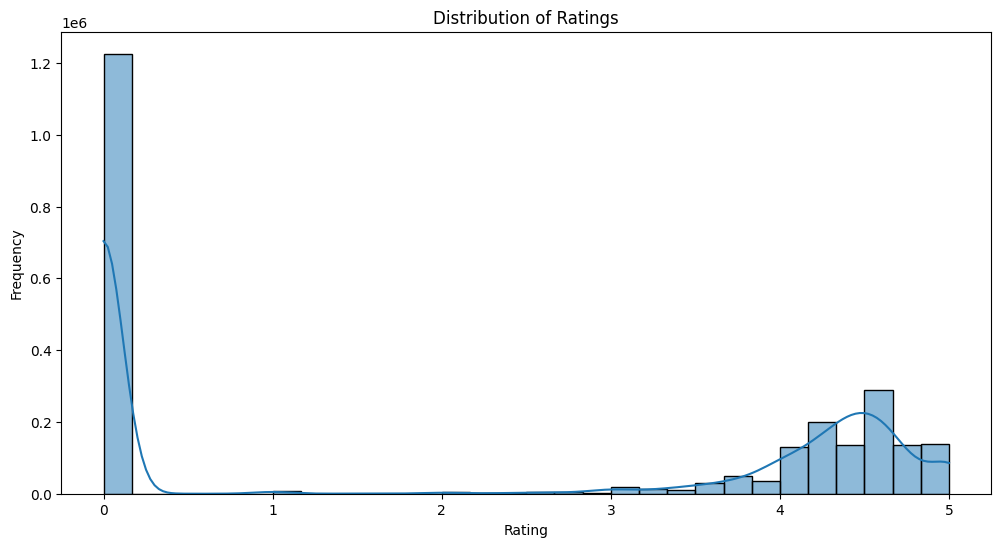

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

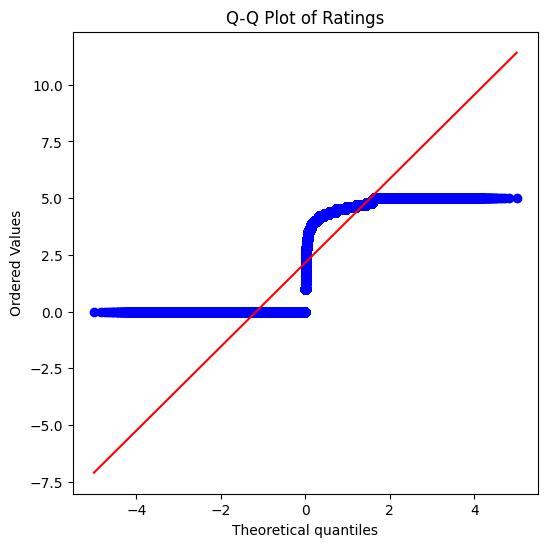

In [55]:
from scipy.stats import skew, kurtosis, norm, probplot
plt.figure(figsize=(6, 6))
probplot(df['stars'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Ratings')
plt.show()

No normal distribution.

The most common rating is zero.